In [2]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy scipy
sys.path.append('.')
import plotUtil


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Average node and connection counts from the CPPN and DSP networks in the sound genomes.

In [45]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817612663.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685832633591.json'
json_file_path = '/Users/bjornpjo/Developer/apps/kromosynth-cli/cli-app/conf/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693487991208.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
title = "genomeStatistics: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

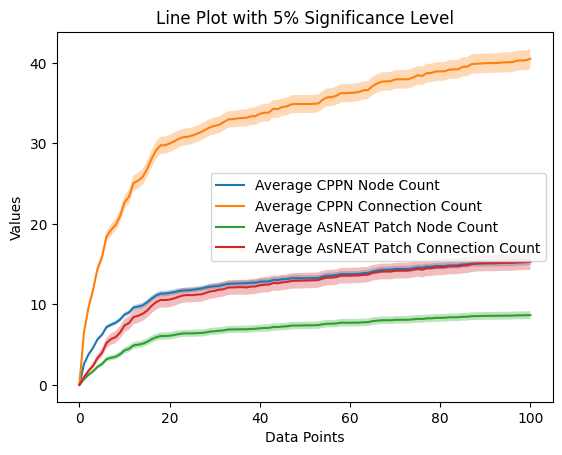

In [7]:


# Get the array of objects from the attribute genomeStatistics in the JSON file at evoRuns[0].iterations[0].genomeStatistics
genome_statistics = data['evoRuns'][0]['iterations'][0]['genomeStatistics']

# Plot four lines in one graph from the genomeStatistics array, where each line corresponds to one of the four attributes in the genomeStatistics objects:
# # - averageCppnNodeCount
# # - averageCppnConnectionCount
# # - averageAsNEATPatchNodeCount
# # - averageAsNEATPatchConnectionCount
# # For each line, plot a confidence interval with the values of the attribute in the genomeStatistics objects, where the confidence interval is defined by the attributes:
# # - cppnNodeCountStdDev
# # - cppnConnectionCountStdDev
# # - asNEATPatchNodeCountStdDev
# # - asNEATPatchConnectionCountStdDev
# # The x-axis is the iteration number, and the y-axis is the value of the attribute multiplied by x_multiplier
# import matplotlib.pyplot as plt
# import numpy as np
# x_values = np.arange(len(genome_statistics)) * x_multiplier
# plt.figure(figsize=(20,10))
# # plt.plot(x_values, obj['averageCppnNodeCount'] for obj in array  [x['iteration'] for x in genome_statistics], [x['averageCppnNodeCount'] * x_multiplier for x in genome_statistics], label='averageCppnNodeCount')
# plt.plot(x_values, (obj['averageCppnNodeCount'] for obj in genome_statistics), label='averageCppnNodeCount')
# # plt.plot([x['iteration'] for x in genome_statistics], [x['averageCppnConnectionCount'] * x_multiplier for x in genome_statistics], label='averageCppnConnectionCount')
# # plt.plot([x['iteration'] for x in genome_statistics], [x['averageAsNEATPatchNodeCount'] * x_multiplier for x in genome_statistics], label='averageAsNEATPatchNodeCount')
# # plt.plot([x['iteration'] for x in genome_statistics], [x['averageAsNEATPatchConnectionCount'] * x_multiplier for x in genome_statistics], label='averageAsNEATPatchConnectionCount')
# # plt.fill_between([x['iteration'] for x in genome_statistics], [(x['averageCppnNodeCount'] - x['cppnNodeCountStdDev']) * x_multiplier for x in genome_statistics], [(x['averageCppnNodeCount'] + x['cppnNodeCountStdDev']) * x_multiplier for x in genome_statistics], alpha=0.2)
# # plt.fill_between([x['iteration'] for x in genome_statistics], [(x['averageCppnConnectionCount'] - x['cppnConnectionCountStdDev']) * x_multiplier for x in genome_statistics], [(x['averageCppnConnectionCount'] + x['cppnConnectionCountStdDev']) * x_multiplier for x in genome_statistics], alpha=0.2)
# # plt.fill_between([x['iteration'] for x in genome_statistics], [(x['averageAsNEATPatchNodeCount'] - x['asNEATPatchNodeCountStdDev']) * x_multiplier for x in genome_statistics], [(x['averageAsNEATPatchNodeCount'] + x['asNEATPatchNodeCountStdDev']) * x_multiplier for x in genome_statistics], alpha=0.2)
# # plt.fill_between([x['iteration'] for x in genome_statistics], [(x['averageAsNEATPatchConnectionCount'] - x['asNEATPatchConnectionCountStdDev']) * x_multiplier for x in genome_statistics], [(x['averageAsNEATPatchConnectionCount'] + x['asNEATPatchConnectionCountStdDev']) * x_multiplier for x in genome_statistics], alpha=0.2)
# plt.legend()
# plt.show()

# Extracting attributes
x = np.arange(len(genome_statistics))  # x-coordinates for each line
averageCppnNodeCount = [item["averageCppnNodeCount"] for item in genome_statistics]
averageCppnConnectionCount = [item["averageCppnConnectionCount"] for item in genome_statistics]
averageAsNEATPatchNodeCount = [item["averageAsNEATPatchNodeCount"] for item in genome_statistics]
averageAsNEATPatchConnectionCount = [item["averageAsNEATPatchConnectionCount"] for item in genome_statistics]
cppnNodeCountStdDev = np.array([item["cppnNodeCountStdDev"] for item in genome_statistics])
cppnConnectionCountStdDev = np.array([item["cppnConnectionCountStdDev"] for item in genome_statistics])
asNEATPatchNodeCountStdDev = np.array([item["asNEATPatchNodeCountStdDev"] for item in genome_statistics])
asNEATPatchConnectionCountStdDev = np.array([item["asNEATPatchConnectionCountStdDev"] for item in genome_statistics])

# # Compute Z-score for a 95% confidence interval
# z_score = norm.ppf(0.975)

# # Compute Z-score for an 80% confidence interval
# significance_level = 0.80
# z_score = norm.ppf((1 + significance_level) / 2)

significance_level = 0.05
z_score = norm.ppf((1 + significance_level) / 2)

# Plotting lines with confidence intervals
plt.plot(x, averageCppnNodeCount, label="Average CPPN Node Count")
plt.fill_between(x, np.subtract(averageCppnNodeCount, z_score * cppnNodeCountStdDev),
                 np.add(averageCppnNodeCount, z_score * cppnNodeCountStdDev), alpha=0.3)
plt.plot(x, averageCppnConnectionCount, label="Average CPPN Connection Count")
plt.fill_between(x, np.subtract(averageCppnConnectionCount, z_score * cppnConnectionCountStdDev),
                 np.add(averageCppnConnectionCount, z_score * cppnConnectionCountStdDev), alpha=0.3)
plt.plot(x, averageAsNEATPatchNodeCount, label="Average AsNEAT Patch Node Count")
plt.fill_between(x, np.subtract(averageAsNEATPatchNodeCount, z_score * asNEATPatchNodeCountStdDev),
                 np.add(averageAsNEATPatchNodeCount, z_score * asNEATPatchNodeCountStdDev), alpha=0.3)
plt.plot(x, averageAsNEATPatchConnectionCount, label="Average AsNEAT Patch Connection Count")
plt.fill_between(x, np.subtract(averageAsNEATPatchConnectionCount, z_score * asNEATPatchConnectionCountStdDev),
                 np.add(averageAsNEATPatchConnectionCount, z_score * asNEATPatchConnectionCountStdDev), alpha=0.3)


# Customize the plot
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Line Plot with 5% Significance Level")
plt.legend()

# Display the plot
plt.show()


**For all evoruns**: The average number of nodes and connections in the CPPN and DSP networks in the sound genomes.

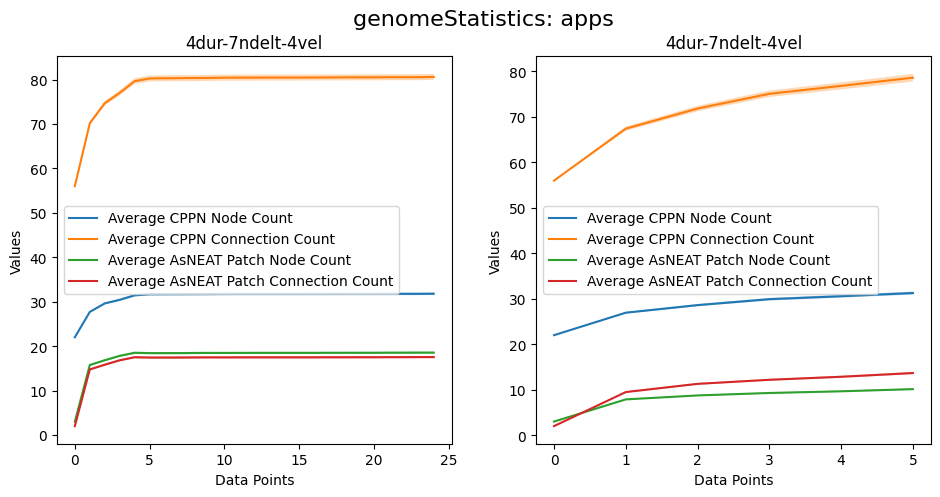

In [47]:
genome_statistics_arrays = plotUtil.extract_data_arrays(data, "genomeStatistics", forceFloat=False)

def plot_genome_statistics(plt, ax, x_values, array, arrayLabel):

    if len(arrayLabel) > 50:
        arrayLabel = arrayLabel[:50] + '\n' + arrayLabel[50:]
        plt.subplots_adjust(hspace=0.4)
        # add space for the second line of the title
        plt.subplots_adjust(top=0.96)

    # Extracting attributes
    x = np.arange(len(array))  # x-coordinates for each line
    averageCppnNodeCount = [item["averageCppnNodeCount"] for item in array]
    averageCppnConnectionCount = [item["averageCppnConnectionCount"] for item in array]
    averageAsNEATPatchNodeCount = [item["averageAsNEATPatchNodeCount"] for item in array]
    averageAsNEATPatchConnectionCount = [item["averageAsNEATPatchConnectionCount"] for item in array]
    cppnNodeCountStdDev = np.array([item["cppnNodeCountStdDev"] for item in array])
    cppnConnectionCountStdDev = np.array([item["cppnConnectionCountStdDev"] for item in array])
    asNEATPatchNodeCountStdDev = np.array([item["asNEATPatchNodeCountStdDev"] for item in array])
    asNEATPatchConnectionCountStdDev = np.array([item["asNEATPatchConnectionCountStdDev"] for item in array])

    # # Compute Z-score for a 95% confidence interval
    # z_score = norm.ppf(0.975)

    # # Compute Z-score for an 80% confidence interval
    # significance_level = 0.80
    # z_score = norm.ppf((1 + significance_level) / 2)

    significance_level = 0.05
    z_score = norm.ppf((1 + significance_level) / 2)

    # Plotting lines with confidence intervals
    ax.plot(x, averageCppnNodeCount, label="Average CPPN Node Count")
    ax.fill_between(x, np.subtract(averageCppnNodeCount, z_score * cppnNodeCountStdDev),
                    np.add(averageCppnNodeCount, z_score * cppnNodeCountStdDev), alpha=0.3)
    ax.plot(x, averageCppnConnectionCount, label="Average CPPN Connection Count")
    ax.fill_between(x, np.subtract(averageCppnConnectionCount, z_score * cppnConnectionCountStdDev),
                    np.add(averageCppnConnectionCount, z_score * cppnConnectionCountStdDev), alpha=0.3)
    ax.plot(x, averageAsNEATPatchNodeCount, label="Average AsNEAT Patch Node Count")
    ax.fill_between(x, np.subtract(
        averageAsNEATPatchNodeCount, z_score * asNEATPatchNodeCountStdDev),
                    np.add(averageAsNEATPatchNodeCount, z_score * asNEATPatchNodeCountStdDev), alpha=0.3)
    ax.plot(x, averageAsNEATPatchConnectionCount, 
            label="Average AsNEAT Patch Connection Count")
    ax.fill_between(x, np.subtract(
        averageAsNEATPatchConnectionCount, z_score * asNEATPatchConnectionCountStdDev),
                    np.add(averageAsNEATPatchConnectionCount, z_score * asNEATPatchConnectionCountStdDev), alpha=0.3)
    
    # Customize the plot
    ax.set_xlabel("Data Points")
    ax.set_ylabel("Values")
    ax.set_title(arrayLabel) # + " - 5% Significance Level")
    ax.legend()

plotUtil.render_graphs(genome_statistics_arrays, x_multiplier, plot_genome_statistics, 10, 5, title)

/var/folders/9c/k58kql8n6gbbdkh5dt01pd1r0000gn/T/ipykernel_62383/1899293898.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x=df.index, y="averageCppnNodeCount", label="Average CPPN Node Count", ci=95)
/var/folders/9c/k58kql8n6gbbdkh5dt01pd1r0000gn/T/ipykernel_62383/1899293898.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x=df.index, y="averageCppnConnectionCount", label="Average CPPN Connection Count", ci=95)
/var/folders/9c/k58kql8n6gbbdkh5dt01pd1r0000gn/T/ipykernel_62383/1899293898.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x=df.index, y="averageAsNEATPatchNodeCount", label="Average AsNEAT Patch Node Count", ci=95)
/var/folders/9c/k58kql8n6gbbdkh5dt01pd1r0000gn/T/ipykernel_62383/1899293898.py:11: FutureWarning: 

The `ci` parameter is d

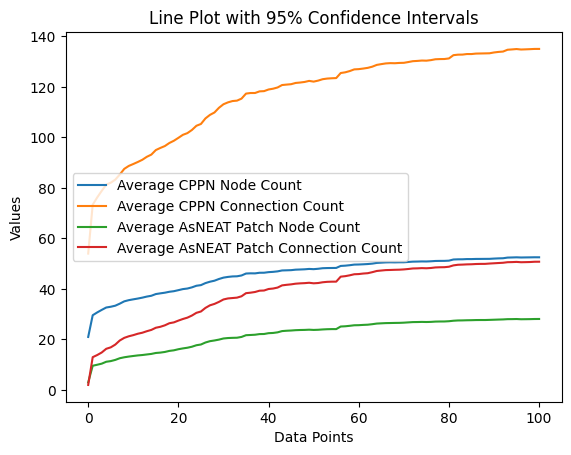

In [25]:
import seaborn as sns
import pandas as pd

# Convert data to a pandas DataFrame
df = pd.DataFrame(genome_statistics)

# Plotting lines with confidence intervals
sns.lineplot(data=df, x=df.index, y="averageCppnNodeCount", label="Average CPPN Node Count", ci=95)
sns.lineplot(data=df, x=df.index, y="averageCppnConnectionCount", label="Average CPPN Connection Count", ci=95)
sns.lineplot(data=df, x=df.index, y="averageAsNEATPatchNodeCount", label="Average AsNEAT Patch Node Count", ci=95)
sns.lineplot(data=df, x=df.index, y="averageAsNEATPatchConnectionCount", label="Average AsNEAT Patch Connection Count", ci=95)

# Customize the plot
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Line Plot with 95% Confidence Intervals")

# Display the plot
plt.show()
